# Analysis of Football Players in FIFA-19
### Group: Group 1
### Team: Avinash Kumar, Vamsi Krishna, Vishwas Narayan
### Project: Digital Tools for Strategic Planning (DOORSTEP)

Import Statements for data analysis using pandas, data manipulation using numpy and plotting the visualizations such as choropleth map, line plots, horizontal barplots using plotly, matplotlib and seaborn.

In [1]:
# Pandas libraries
import pandas as pd
import pandasql as ps
import pandas_profiling as pp
import numpy as np
from collections import OrderedDict

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')
init_notebook_mode(connected=True)

## Exploratory and Data Analysis

#### Reading the Dataset on FIFA-19
##### data: 
This dataset includes details about different football players featured in EA's FIFA 19.
##### positions: 
This dataset includes detailed information about the different positions with its full names on a football field.

In [2]:
data = pd.read_excel('2021-06-23_Dataset_Fifa_19.xlsx')
positions = pd.read_excel('fifa19_positions.xlsx')

In [3]:
# Dropping columns which are of very less significance.

# data.drop(columns=['Photo', 'Nationality', 'Flag', 'Potential', 'Club Logo','Wage', 'Special',
#                    'International Reputation','Skill Moves','Work Rate','Body Type','Real Face',
#                    'Jersey Number','Joined','Loaned From','Contract Valid Until', 'Release Clause',
#                    'Joined', 'Contract Valid Until'], inplace=True)

In [4]:
display(data.head())
display(data.info())
display(data.describe())

,Order,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order                     18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18179 non-null  object 
 11  Value                     18179 non-null  object 
 12  Wage                      18179 non-null  object 
 13  Special                   18179 non-null  float64
 14  Prefer

None

,Order,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18179.000000,18131.000000,18131.000000,18131.000000,18119.000000,...,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.947907,1.113397,2.947217,2.361701,19.544401,...,48.560807,58.658541,47.276212,47.697149,45.660030,16.618057,16.393194,16.231758,16.390822,16.710937
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.585019,0.394310,0.660462,0.756292,15.952570,...,15.706617,11.432878,19.909676,21.670806,21.296616,17.697405,16.909519,16.503546,17.037065,17.960529
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1458.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
display(positions)

,Position,Description,Zone
0,GK,Goal Keeper,GoalKeeper
1,CB,Centre Back,Defense
2,LCB,Left Centre Back,Defense
3,RCB,Right Centre Back,Defense
4,LB,Left Back,Defense
5,RB,Right Back,Defense
6,LWB,Left Wing Back,Defense
7,RWB,Right Wing Back,Defense
8,CDM,Centre Defensive Midfielder,Midfield
9,LDM,Left Defensive Midfielder,Midfield


### Profiling

Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:</br>

In [6]:
#pp.ProfileReport(data)

Grouping data based on the 'Position'

In [7]:
posData = data.groupby("Position").count()
posData = posData.sort_values(by = "Order", ascending = True)

# Data required to create horizontal bar chart data
bars = list(posData.index)
y_pos = np.arange(len(bars))
values = list(posData["Order"].values) 

In [8]:
# Palette by positions dictionary
posPalette = dict()
posPalette["GoalKeeper"] = "#dc3912"
posPalette["Defense"] = "#3366cc"
posPalette["Midfield"] = "#ff9900"
posPalette["Attack"] = "#109618"

# Colors by positions dictionary
posColors = dict()
for ix in range(len(positions)):
    pos = positions.Position[ix]
    zone = positions.Zone[ix] 
    posColors[pos] = posPalette[zone]

## Horizontal Barchart to determine the number of players per position
The number of football players can be distinguished based on thier positions. It is found that most of the players per individual positions are the Strikers followed by Goalkeepers and then centre back players. 

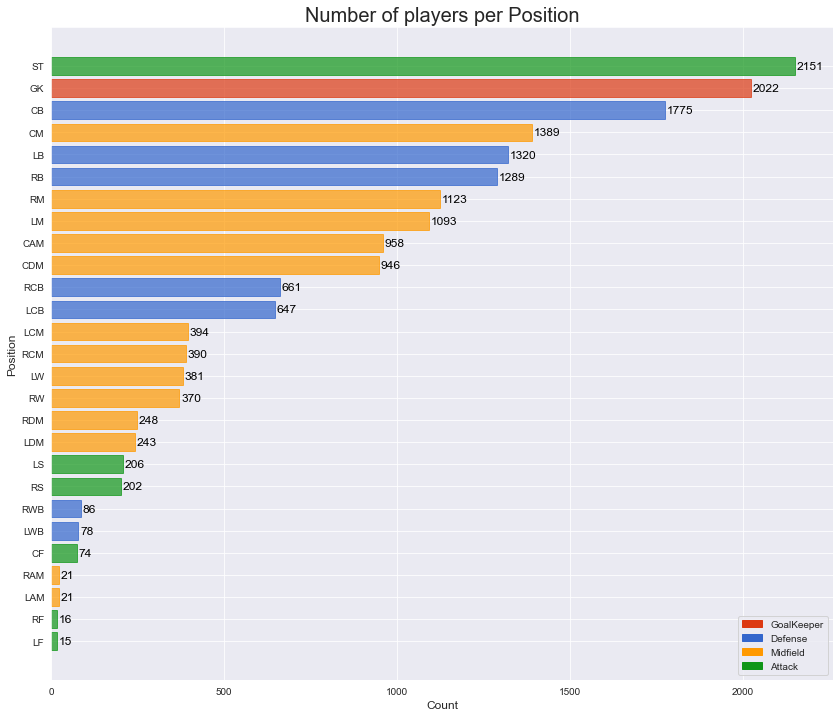

In [9]:
# Set up the matplotlib figure
fig, ax0 = plt.subplots(figsize = (14, 12))

# Horizontal barchart
barlist = plt.barh(y_pos, values, alpha = 0.7)
plt.yticks(y_pos, bars)
plt.title("Number of players per Position", fontsize = 20)

# Add bar labels
for i, v in enumerate(values):
    ax0.text(v + 5, i - .15, str(v), color = "black", fontweight = "normal", fontsize = 12)
    barlist[i].set_color(posColors[bars[i]])

# Add custom legend
gk_patch = mpatches.Patch(color = "#dc3912", label = "GoalKeeper")
df_patch = mpatches.Patch(color = "#3366cc", label = "Defense")
mf_patch = mpatches.Patch(color = "#ff9900", label = "Midfield")
at_patch = mpatches.Patch(color = "#109618", label = "Attack")
plt.legend(handles = [gk_patch, df_patch, mf_patch, at_patch])

# Plot setup
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Position", fontsize = 12)
plt.show()

In [10]:
# Calculate the number of players per zone 
zoneData = dict()
for ix1 in range(len(positions)):
    pos1 = positions.Position[ix1]
    
    for ix2 in range(len(posData)):
        pos2 = posData.index[ix2]
        
        if pos1 == pos2:
            zone = positions.Zone[ix1]
            count = posData.Order[ix2]
            
            if zone in zoneData:
                zoneData[zone] += count
            else:
                zoneData[zone] = count
            break;
zoneData

{'GoalKeeper': 2022, 'Defense': 5856, 'Midfield': 7577, 'Attack': 2664}

In [11]:
# Sorting dictionary in ascending order based on values
zoneData = OrderedDict(sorted(zoneData.items(), key = lambda kv: kv[1], reverse = False))
zoneData

OrderedDict([('GoalKeeper', 2022),
             ('Attack', 2664),
             ('Defense', 5856),
             ('Midfield', 7577)])

# Horizontal Barchart for determine the number of players per zone
The number of football players can be distinguished based on thier zones. It is found that most of the players per individual zones are the Midfielders followed by Defensive players and then the Attackers. 

In [12]:
# Create horizontal bar chart data
bars = list(zoneData.keys())
y_pos = np.arange(len(zoneData))
values = list(zoneData.values())

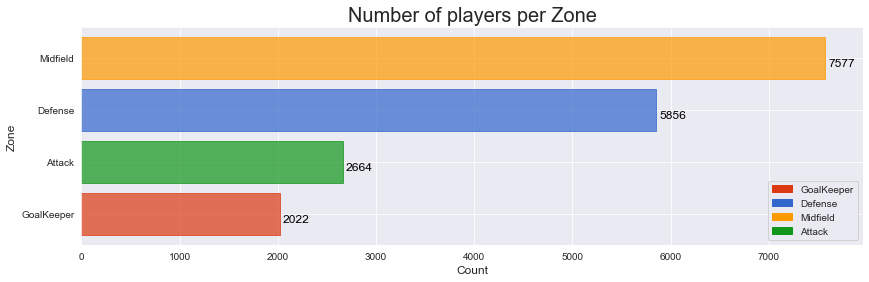

In [13]:
# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (14, 4))

# Horizontal barchart
barlist = plt.barh(y_pos, values, alpha = 0.7)
plt.yticks(y_pos, bars)
plt.title("Number of players per Zone", fontsize = 20)

# Add bar labels
for i, v in enumerate(values):
    ax1.text(v + 30, i - .15, str(v), color = "black", fontweight = "normal", fontsize = 12)
    barlist[i].set_color(posPalette[bars[i]])

# Add custom legend
gk_patch = mpatches.Patch(color = "#dc3912", label = "GoalKeeper")
df_patch = mpatches.Patch(color = "#3366cc", label = "Defense")
mf_patch = mpatches.Patch(color = "#ff9900", label = "Midfield")
at_patch = mpatches.Patch(color = "#109618", label = "Attack")
plt.legend(handles = [gk_patch, df_patch, mf_patch, at_patch])

# Plot setup
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Zone", fontsize = 12)
plt.show()

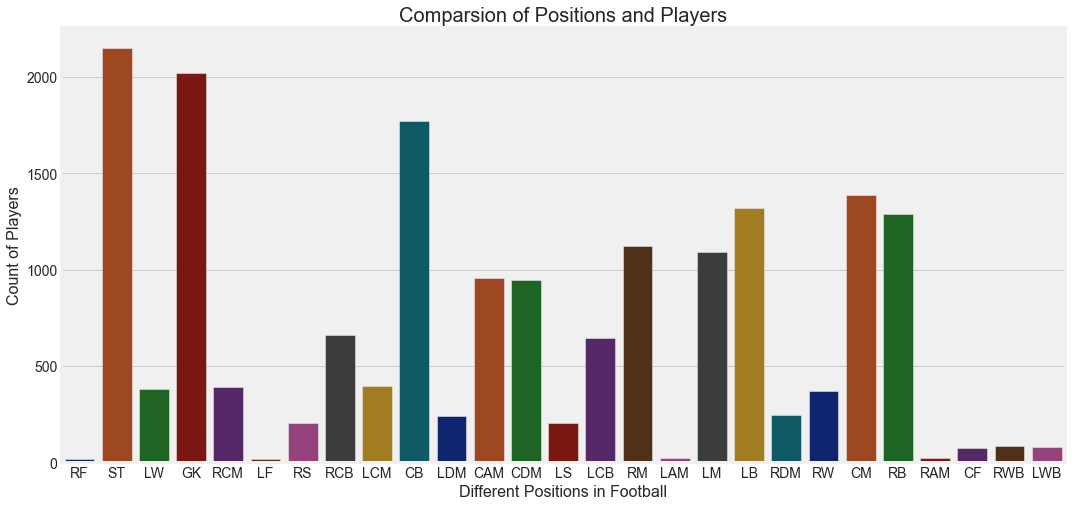

In [14]:
#different positions acquired by the players

plt.figure(figsize = (18,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'dark')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparsion of Positions and Players', fontsize = 20)
plt.show()

In [15]:
data.select_dtypes(include=object).columns
data['Value'] = data['Value'].astype(str)
data['Wage'] = data['Wage'].astype(str)

In [16]:
#Function to convert value and wage of the player.
def currencyConverter(val):
    if (val[-1] == 'M'):
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif (val[-1] == 'K'):
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0

In [17]:
data['Value in Pounds'] = data['Value'].apply(currencyConverter)
data['Wage in Pounds'] = data['Wage'].apply(currencyConverter)

data.drop(columns=['Value', 'Wage'], inplace=True)

data.head()

,Order,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value in Pounds,Wage in Pounds
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,110500000.0,565000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,77000000.0,405000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,118500000.0,290000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000000.0,260000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,102000000.0,355000.0


# Conversion of Skills into proper format 

In [18]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [19]:
#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [20]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in skill_columns:
    data[col] = data[col].apply(skillConverter)

In [21]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,...,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0


# Dealing with invalid data in the body type field

In [22]:
data['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', nan, 'Akinfenwa'],
      dtype=object)

In [23]:
data['Body Type'][data['Body Type'] == 'Messi'] = 'Lean'
data['Body Type'][data['Body Type'] == 'C. Ronaldo'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Neymar'] = 'Lean'
data['Body Type'][data['Body Type'] == 'Courtois'] = 'Lean'
#PLAYER_BODY_TYPE_25 is the body type of Mohammed Salah who has a Normal body type.
data['Body Type'][data['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Shaqiri'] = 'Stocky'
data['Body Type'][data['Body Type'] == 'Akinfenwa'] = 'Stocky'

In [24]:
print(data['Position'].unique())
print(data['Position'].nunique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB' nan
 'LWB']
27


## Selection of players with who are 'Strikers', 'Centre Defensive Midfielders' and 'GoalKeepers'

Filtering the data for finding the main differences between the players who are "ST", "CDM" and "GK". 

In [25]:
position_df = data[(data['Position'] == 'ST') | (data['Position'] == 'CDM') | (data['Position'] == 'GK')]
position_df

,Order,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value in Pounds,Wage in Pounds
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,77000000.0,405000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000000.0,260000.0
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,68000000.0,94000.0
10,10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,...,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M,77000000.0,205000.0
16,16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,...,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M,83500000.0,205000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18194,18194,245862,J. Milli,18,https://cdn.sofifa.org/players/4/19/245862.png,Italy,https://cdn.sofifa.org/flags/27.png,47,65,Lecce,...,10.0,11.0,52.0,52.0,52.0,40.0,44.0,€109K,50000.0,1000.0
18198,18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,...,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K,60000.0,1000.0
18200,18200,231381,J. Young,18,https://cdn.sofifa.org/players/4/19/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,47,62,Swindon Town,...,17.0,14.0,11.0,15.0,12.0,12.0,11.0,€143K,60000.0,1000.0
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,60000.0,1000.0


## Piechart Visualization for determining the distribution of the players positive-wise 
The below piechart shows that there are more players who are Strikers about 42% followed by Goalkeepers and then Centre defensive Midfielders 

In [26]:
pie_vis1 = go.Pie(values=position_df['Position'].value_counts().values,
                labels=position_df['Position'].value_counts().index.values,
                hole=0.3
               )
 

layout = go.Layout(title={        
        'text': "<b>Distribution of Players Position-Wise</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig = go.Figure(data=[pie_vis1], layout=layout)
py.iplot(fig)

## Piechart Visualization for determining the distribution of the players positive-wise 
The below piechart shows that there are majority of the players prefer their right foot compared to the left.

In [27]:
pie_vis2 = go.Pie(values=position_df['Preferred Foot'].value_counts().values,
                 labels=position_df['Preferred Foot'].value_counts().index.values,
                 hole=0.3
                )
 

layout = go.Layout(title={
        'text': "<b>Preferred Foot</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig = go.Figure(data=[pie_vis2], layout=layout)
py.iplot(fig)

## Boxplot Visualization of Work Rate vs Overall
The below boxplot shows that the players have almost similar Overall ratings across different work rates

In [28]:
box_vis = go.Box(x=position_df['Work Rate'],
                y=position_df['Overall']
               )

layout = go.Layout(title={
        'text': "<b>Work Rate vs Overall</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         xaxis=dict(title='<b><i>Work Rate</b></i>'),
         yaxis=dict(title='<b><i>Overall</b></i>'))

fig = go.Figure(data=[box_vis], layout=layout)
py.iplot(fig)

In [29]:
box_vis2 = go.Box(x=position_df['Body Type'],
                y=position_df['Overall']
               )

layout = go.Layout(title={
        'text': "<b>Body Type vs Overall</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         xaxis=dict(title='<b><i>Body Type</b></i>'),
         yaxis=dict(title='<b><i>Overall</b></i>'))

fig2 = go.Figure(data=[box_vis2], layout=layout)
py.iplot(fig2)

### Polar Chart Visualization: Main differences between players with the position “ST” (forward), players with the position “CDM” (center defensive midfielder), and players with the position “GK” (goalkeeper) 

Scatterpolar visualization provides an overview of the attributes of the different players. It can used to clearly distinguish between different skills set and the player type based on the position.

Distinction of the players by choosing 6 attributes 'Crossing', 'Finishing', 'FKAccuracy','StandingTackle', 'Marking' and 'Interceptions'.Data is grouped by Position and average is calculated based on these 6 attributes. It is found that Strikers are far better at Finishing compared with other attributes whereas the Centre Defensive Midfielders are better at Tackling, Marking and Interceptions and goalkeepers are not involved in field activities which makes them less in these attributes.

In [30]:
df_skills = position_df.groupby(by='Position')['Crossing', 'Finishing', 'FKAccuracy', 
                            'StandingTackle', 'Marking', 'Interceptions'].mean().reset_index()

In [31]:
trace5a = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'ST'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Strikers'
                         )

trace5b = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'CDM'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Center Defensive Midfielders'
                         )

trace5c = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'GK'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
                   title={
        'text': "<b>1-Differences between Strikers, Center Defensive Midfielders and Goal Keepers</b>",
        'y':0.9,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'},
         xaxis=dict(title='<b><i>Work Rate</b></i>'),
         yaxis=dict(title='<b><i>Overall</b></i>'))

fig = go.Figure(data=[trace5a, trace5b, trace5c], layout=layout)
py.iplot(fig)

### Polar Chart Visualization 2: Main differences between players with the position “ST” (forward), players with the position “CDM” (center defensive midfielder), and players with the position “GK” (goalkeeper) 

Distinction of the players by choosing 6 attributes 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'LongPassing', 'SprintSpeed' and 'Acceleration'.
Data is grouped by Position and average is calculated based on these 6 attributes.It is found that Strikers are far better at Heading Accuracy, Acceleration compared with other attributes whereas the Centre Defensive Midfielders are better at ShortPassing, Dribbling and LongPassing.
and goalkeepers are not involved in field activities which makes them less in these attributes.

In [32]:
df_skills1 = position_df.groupby(by='Position')['HeadingAccuracy', 'ShortPassing', 'Dribbling', 
                                 'LongPassing', 'SprintSpeed','Aggression'].mean().reset_index()

In [33]:
trace6a = go.Scatterpolar(theta=['HeadingAccuracy', 'ShortPassing', 'Dribbling', 
                                 'LongPassing', 'SprintSpeed',
                                 'Aggression'
                                ],
                          r=df_skills1[df_skills1['Position'] == 'ST']
                          [['HeadingAccuracy', 'ShortPassing', 'Dribbling', 
                            'LongPassing', 'SprintSpeed','Aggression']].values[0],
                          fill='toself',
                          name='Strikers'
                         )

trace6b = go.Scatterpolar(theta=['HeadingAccuracy', 'ShortPassing', 'Dribbling', 
                                 'LongPassing', 'SprintSpeed',
                                 'Aggression'
                                ],
                          r=df_skills1[df_skills1['Position'] == 'CDM']
                          [['HeadingAccuracy', 'ShortPassing', 'Dribbling', 
                            'LongPassing', 'SprintSpeed','Aggression']].values[0],
                          fill='toself',
                          name='Center Defensive Midfielders'
                         )

trace6c = go.Scatterpolar(theta=['HeadingAccuracy', 'ShortPassing', 'Dribbling', 
                                 'LongPassing', 'SprintSpeed',
                                 'Aggression'
                                ],
                          r=df_skills1[df_skills1['Position'] == 'GK']
                          [['HeadingAccuracy', 'ShortPassing', 'Dribbling', 
                            'LongPassing','SprintSpeed','Aggression']].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
                                      title={
        'text': "<b>2-Differences between Strikers, Center Defensive Midfielders and Goal Keepers</b>",
        'y':0.9,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'}
                  )

fig = go.Figure(data=[trace6a, trace6b, trace6c], layout=layout)
py.iplot(fig)

### Polar Chart Visualization-3: Main differences between players with the position “ST” (forward), players with the position “CDM” (center defensive midfielder), and players with the position “GK” (goalkeeper) 

Distinction of the players by choosing 6 attributes 'Agility', 'Positioning', 'Jumping','Stamina', 'Strength' and 'Vision'.
Data is grouped by position and average is calculated based on these 6 attributes.It is found that Strikers and Centre Defensive Midfielders almost have the similar characteristics of these 6 attributes except for position where Strikers dominate here. Goal keepers have slightly less stamina and vision compared with the other two types of players.

In [34]:
df_skills2 = position_df.groupby(by='Position')['Agility', 'Positioning', 'Jumping', 
                                 'Stamina', 'Strength', 'Vision'].mean().reset_index()

In [35]:
trace7a = go.Scatterpolar(theta=['Agility', 'Positioning', 'Jumping', 
                                 'Stamina', 'Strength', 'Vision'
                                ],
                          r=df_skills2[df_skills2['Position'] == 'ST']
                          [['Agility', 'Positioning', 'Jumping', 
                                 'Stamina', 'Strength', 'Vision']].values[0],
                          fill='toself',
                          name='Strikers'
                         )

trace7b = go.Scatterpolar(theta=['Agility', 'Positioning', 'Jumping', 
                                 'Stamina', 'Strength', 'Vision'
                                ],
                          r=df_skills2[df_skills2['Position'] == 'CDM']
                          [['Agility', 'Positioning', 'Jumping', 
                                 'Stamina', 'Strength', 'Vision']].values[0],
                          fill='toself',
                          name='Center Defensive Midfielders'
                         )

trace7c = go.Scatterpolar(theta=['Agility', 'Positioning', 'Jumping', 
                                 'Stamina', 'Strength', 'Vision'
                                ],
                          r=df_skills2[df_skills2['Position'] == 'GK']
                          [['Agility', 'Positioning', 'Jumping', 
                                 'Stamina', 'Strength', 'Vision']].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
        title={
        'text': "<b>3-Differences between Strikers, Center Defensive Midfielders and Goal Keepers</b>",
        'y':0.9,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'}
                  )

fig = go.Figure(data=[trace7a, trace7b, trace7c], layout=layout)
py.iplot(fig)

### Polar Chart Visualization-4: Main differences between players with the position “ST” (forward), players with the position “CDM” (center defensive midfielder), and players with the position “GK” (goalkeeper) 

Distinction of the players by choosing 6 attributes 'Penalties', 'Composure', 'Positioning','StandingTackle', 'SlidingTackle' and 'LongShots'.
Data is grouped by position and average is calculated based on these 6 attributes.It is found that Strikers are better at Penalties and Positioning.The Centre Defensive Midfielders are better at Standing Tackle and Sliding Tackle of these 6 attributes. Goal keepers have no roles such as tackling and positioning.

In [36]:
df_skills3 = position_df.groupby(by='Position')['Penalties', 'Composure', 'Positioning', 
                                 'StandingTackle', 'SlidingTackle', 'LongShots'].mean().reset_index()

In [37]:
trace8a = go.Scatterpolar(theta=['Penalties', 'Composure', 'Positioning', 
                                 'StandingTackle', 'SlidingTackle', 'LongShots'
                                ],
                          r=df_skills3[df_skills3['Position'] == 'ST']
                          [['Penalties', 'Composure', 'Positioning', 
                                 'StandingTackle', 'SlidingTackle', 'LongShots']].values[0],
                          fill='toself',
                          name='Strikers'
                         )

trace8b = go.Scatterpolar(theta=['Penalties', 'Composure', 'Positioning', 
                                 'StandingTackle', 'SlidingTackle', 'LongShots'
                                ],
                          r=df_skills3[df_skills3['Position'] == 'CDM']
                          [['Penalties', 'Composure', 'Positioning', 
                                 'StandingTackle', 'SlidingTackle', 'LongShots']].values[0],
                          fill='toself',
                          name='Center Defensive Midfielders'
                         )

trace8c = go.Scatterpolar(theta=['Penalties', 'Composure', 'Positioning', 
                                 'StandingTackle', 'SlidingTackle', 'LongShots'
                                ],
                          r=df_skills3[df_skills3['Position'] == 'GK']
                          [['Penalties', 'Composure', 'Positioning', 
                                 'StandingTackle', 'SlidingTackle', 'LongShots']].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
        title={
        'text': "<b>3-Differences between Strikers, Center Defensive Midfielders and Goal Keepers</b>",
        'y':0.9,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'}
                  )

fig = go.Figure(data=[trace8a, trace8b, trace8c], layout=layout)
py.iplot(fig)

### Polar Chart Visualization 5: Main differences between players with the position “ST” (forward), players with the position “CDM” (center defensive midfielder), and players with the position “GK” (goalkeeper) 

Distinction of the players by choosing 6 attributes 'GKDiving', 'GKHandling', 'GKKicking','GKPositioning' and 'GKReflexes'.
Data is grouped by position and average is calculated based on these 6 attributes.It is found that Strikers and the Centre Defensive Midfielders have no roles in the goalkeeping activities.Hence, Goal keepers have clearly a significantly higher rate compared to other players in the goal keeping related skills.

In [38]:
df_skills4 = position_df.groupby(by='Position')['GKDiving', 'GKHandling', 'GKKicking', 
                                 'GKPositioning', 'GKReflexes'].mean().reset_index()

In [39]:
trace9a = go.Scatterpolar(theta=['GKDiving', 'GKHandling', 'GKKicking', 
                                 'GKPositioning', 'GKReflexes'
                                ],
                          r=df_skills4[df_skills4['Position'] == 'ST']
                          [['GKDiving', 'GKHandling', 'GKKicking', 
                                 'GKPositioning', 'GKReflexes']].values[0],
                          fill='toself',
                          name='Strikers'
                         )

trace9b = go.Scatterpolar(theta=['GKDiving', 'GKHandling', 'GKKicking', 
                                 'GKPositioning', 'GKReflexes'
                                ],
                          r=df_skills4[df_skills4['Position'] == 'CDM']
                          [['GKDiving', 'GKHandling', 'GKKicking', 
                                 'GKPositioning', 'GKReflexes']].values[0],
                          fill='toself',
                          name='Center Defensive Midfielders'
                         )

trace9c = go.Scatterpolar(theta=['GKDiving', 'GKHandling', 'GKKicking', 
                                 'GKPositioning', 'GKReflexes'
                                ],
                          r=df_skills4[df_skills4['Position'] == 'GK']
                          [['GKDiving', 'GKHandling', 'GKKicking', 
                                 'GKPositioning', 'GKReflexes']].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
        title={
        'text': "<b>4-Differences between Strikers, Center Defensive Midfielders and Goal Keepers</b>",
        'y':0.9,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'}
                  )

fig = go.Figure(data=[trace9a, trace9b, trace9c], layout=layout)
py.iplot(fig)

### Scatterplot Visualization for the correlation between Finishing and Positioning among the players

The below scatterplot clearly shows the differences between each of the chosen players as we can easily conclude that strikers are better in these two attributes of finishing and positioning followed by center defensive midfielders and finally by goal keepers.


In [40]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

In [41]:
#Transforming categorical feature into numeric.
#Goal Keeper = 0
#Striker = 1
#Center Defensive Midfielder = 2
def pos_numeric(val):
    if val == 'GK':
        return 0
    elif val == 'ST':
        return 1
    else:
        return 2
    
position_df['Position'] = position_df['Position'].apply(pos_numeric)

In [42]:
df_pos = position_df.copy()

#Dropping unnecessary columns
df_pos.drop(columns=['Name', 'Nationality', 'Club','Photo', 'Nationality', 'Flag', 'Potential', 'Club Logo', 'Special',
                   'International Reputation','Skill Moves','Work Rate','Body Type','Real Face',
                   'Jersey Number','Joined','Loaned From','Contract Valid Until', 'Release Clause',
                   'Joined', 'Contract Valid Until'],inplace=True)

In [43]:
df_pos.corr().abs()['Position'].sort_values(ascending=False)

Position           1.000000
ShortPassing       0.858567
Marking            0.855108
StandingTackle     0.854285
GKHandling         0.853887
                     ...   
LAM                0.058044
Wage in Pounds     0.056788
Value in Pounds    0.047327
RM                 0.022365
LM                 0.022365
Name: Position, Length: 68, dtype: float64

In [44]:
df_pos['Frw'] = (df_pos['RF'] + df_pos['ST'] + df_pos['LF'] + df_pos['RS'] + df_pos['LS'] + df_pos['CF']) / 6

df_pos['Mid'] = (df_pos['LW'] + df_pos['RCM'] + df_pos['LCM'] + df_pos['LDM'] + df_pos['CAM'] + df_pos['CDM'] + \
                df_pos['RM'] + df_pos['LAM'] + df_pos['LM'] + df_pos['RDM'] + df_pos['RW'] + df_pos['CM'] + df_pos['RAM'])\
                /13

df_pos['Def'] = (df_pos['RCB'] + df_pos['CB'] + df_pos['LCB'] + df_pos['LB'] + df_pos['RB'] + df_pos['RWB']\
                 + df_pos['LWB']) / 7

df_pos['Gk'] = (df_pos['GKDiving'] + df_pos['GKHandling'] + df_pos['GKKicking'] + df_pos['GKPositioning']\
               + df_pos['GKReflexes']) / 5

df_pos.drop(columns=['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM',
                     'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB',
                     'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
                    ], inplace=True)

In [45]:
print('Correlation with Position: ', df_pos.corr().abs()['Position'].sort_values(ascending=False).index, '\n')
print('Categorical columns in dataset: ', df_pos.select_dtypes(include=object).columns, '\n')
print('Number of features in dataset: ', len(df_pos.columns))

Correlation with Position:  Index(['Position', 'ShortPassing', 'Gk', 'Marking', 'StandingTackle',
       'SlidingTackle', 'BallControl', 'LongPassing', 'Stamina', 'Dribbling',
       'Def', 'Interceptions', 'Crossing', 'Aggression', 'HeadingAccuracy',
       'ShotPower', 'LongShots', 'FKAccuracy', 'Curve', 'Positioning',
       'Penalties', 'Volleys', 'Finishing', 'Agility', 'Vision', 'Balance',
       'Acceleration', 'SprintSpeed', 'Composure', 'Frw', 'Mid', 'Jumping',
       'Weak Foot', 'Strength', 'Reactions', 'Order', 'Overall', 'ID', 'Age',
       'Wage in Pounds', 'Value in Pounds'],
      dtype='object') 

Categorical columns in dataset:  Index(['Preferred Foot', 'Height', 'Weight'], dtype='object') 

Number of features in dataset:  44


In [46]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 12, 8

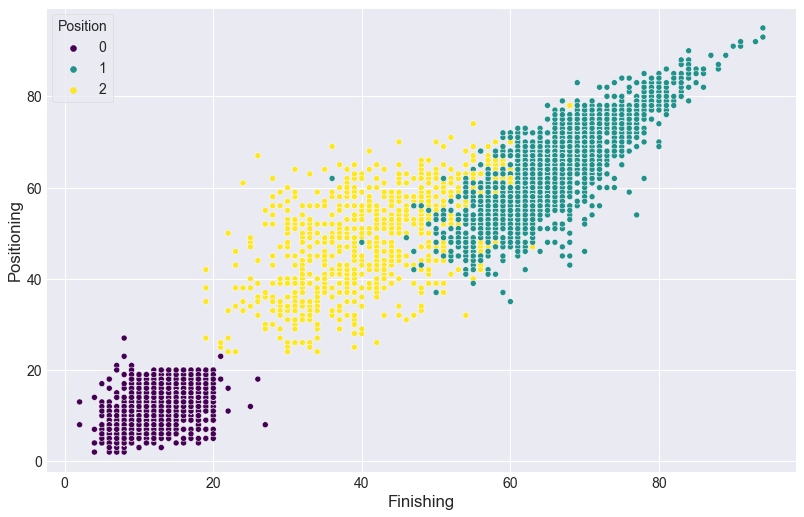

In [47]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

In [48]:
df_pos = df_pos[~((df_pos['Position'] == 1) & (df_pos['Finishing'] > 30) & (df_pos['Positioning'] < 60))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 60) & (df_pos['Positioning'] < 80))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 45))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 60) & (df_pos['Positioning'] > 70))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 65) & (df_pos['Positioning'] > 70))]

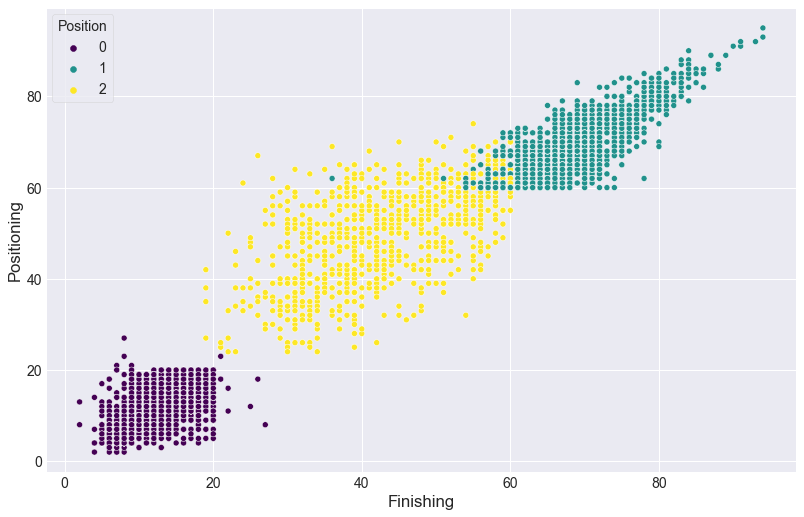

In [49]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()